In [1]:
import streamlit as st

In [7]:
import pandas as pd

def get_data():
    df = pd.read_excel("Sample_Data.xlsx")
    return df

depth_profile = get_data()
depth_profile.head()

,Depth,Nitrogen (N),Phosphorous (P),Potassium (K),Moisture
0,"2""",275,285,295,75
1,"4""",347,357,367,85
2,"8""",185,195,205,95
3,"12""",75,85,95,100


In [2]:
import pandas as pd

# Load the file
with open('TEST.txt', 'r') as file:
    lines = file.readlines()

# Clean each line: strip leading/trailing spaces and pipes, then split
data = [
    [item.strip() for item in line.strip().strip('|').split('|')]
    for line in lines if line.strip()  # skip empty lines
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Optional: Assign column names
df.columns = ['Data Point Number', 'Moisture (%)', 'Nitrogen (N)', 'Phosphorous (P)', 'Potassium (K)', 'Depth']

# Check result
df

,Data Point Number,Moisture (%),Nitrogen (N),Phosphorous (P),Potassium (K),Depth
0,1,56.1,255,39,55,4 in
1,2,55.6,111,39,55,4 in
2,3,56.0,111,39,55,4 in
3,4,56.1,111,39,55,4 in
4,5,56.4,111,39,55,4 in
5,6,56.4,111,39,55,4 in
6,7,56.5,111,39,55,4 in
7,8,56.5,111,39,55,4 in
8,9,56.5,111,39,55,4 in
9,10,56.4,111,40,56,4 in


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv("Crop_recommendation.csv")

# Feature columns (only using N, P, K, temperature, and humidity)
features = ['N', 'P', 'K', 'temperature', 'humidity']
X = df[features]

# Encode the crop labels
le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])
y_categorical = to_categorical(y_encoded)

In [11]:
# Normalize the feature inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [12]:
# Build the neural network
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # softmax for multi-class classification
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.1835 - loss: 2.8360 - val_accuracy: 0.5114 - val_loss: 1.6316
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5678 - loss: 1.3369 - val_accuracy: 0.7955 - val_loss: 0.7604
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.7603 - loss: 0.7230 - val_accuracy: 0.8182 - val_loss: 0.5953
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8497 - loss: 0.5006 - val_accuracy: 0.8693 - val_loss: 0.3882
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.8783 - loss: 0.3846 - val_accuracy: 0.8750 - val_loss: 0.3505
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9112 - loss: 0.2940 - val_accuracy: 0.9205 - val_loss: 0.2650
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9162 - loss: 0.2557 - val_accuracy: 0.9205 - val_loss: 0.2486
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.9166 - loss: 0.2354 - val_accuracy: 0.

In [14]:
# Evaluate on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")


✅ Test Accuracy: 0.9227


In [15]:
# Optional: predict for one input (e.g., a sample with specific N, P, K, temperature, etc.)
sample_input = np.array([[90, 42, 43, 20.5, 80.0]])  # Example input
sample_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_scaled)
predicted_label = le.inverse_transform([np.argmax(prediction)])
print(f"\n🌾 Recommended Crop: {predicted_label[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

🌾 Recommended Crop: rice


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


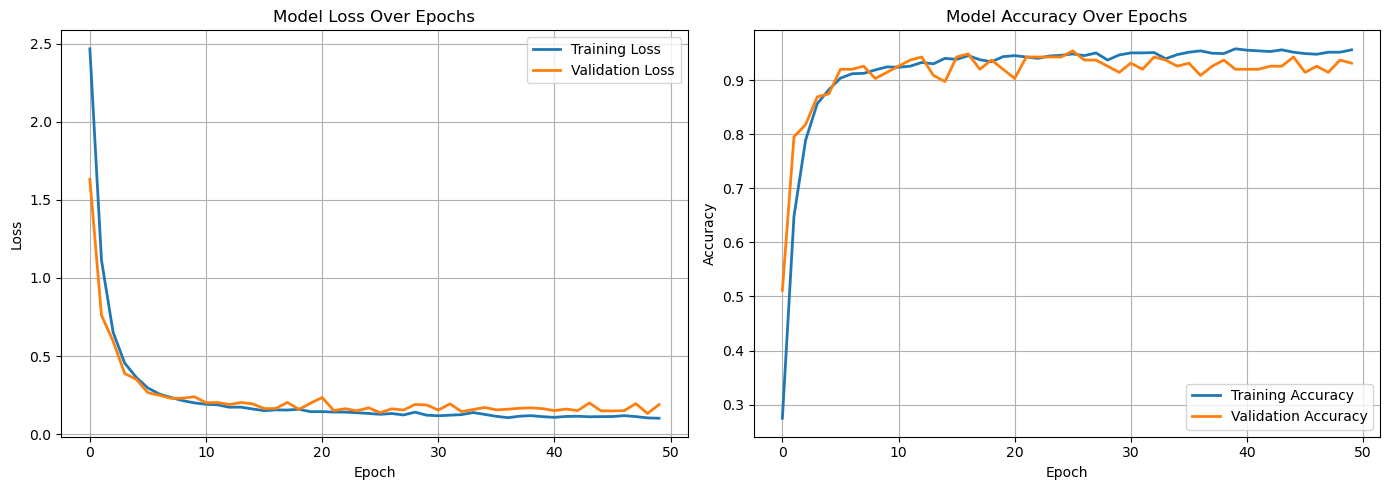

In [17]:
import matplotlib.pyplot as plt
# --- Plot Loss and Accuracy ---
# Create subplots for Loss and Accuracy
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot Loss ---
axs[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axs[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axs[0].set_title('Model Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# --- Plot Accuracy ---
axs[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axs[1].set_title('Model Accuracy Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

# Final layout and display
plt.tight_layout()
plt.show()